<a href="https://colab.research.google.com/github/HeSH-0629/Keras-Study/blob/main/mnist_with_Convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1)) #이미지를 (sample,heigh,width,channel)로 reshape
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
x_val = train_images[:10000]
y_val = train_labels[:10000]
partial_x_train=train_images[10000:]
partial_y_train=train_labels[10000:]
history=model.fit(partial_x_train,
                  partial_y_train, 
                  epochs=20, 
                  batch_size=64,
                  validation_data=(x_val,y_val))

Epoch 1/20
782/782 [==============================] - 4s 4ms/step - loss: 0.4393 - acc: 0.8603 - val_loss: 0.0806 - val_acc: 0.9756
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0578 - acc: 0.9823 - val_loss: 0.0518 - val_acc: 0.9846
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0363 - acc: 0.9878 - val_loss: 0.0386 - val_acc: 0.9888
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0278 - acc: 0.9908 - val_loss: 0.0402 - val_acc: 0.9886
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0207 - acc: 0.9941 - val_loss: 0.0510 - val_acc: 0.9868
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0166 - acc: 0.9941 - val_loss: 0.0543 - val_acc: 0.9868
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0134 - acc: 0.9963 - val_loss: 0.0525 - val_acc: 0.9895
Epoch 8/20
782/782 [==============================] - 3s 4ms/step - loss: 0.

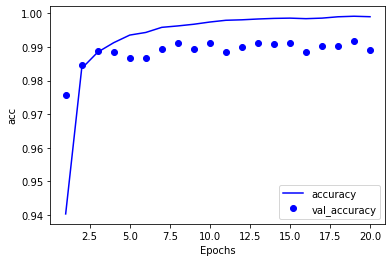

In [10]:
import matplotlib.pyplot as plt
history_dict=history.history
acc=history_dict['acc']
val_acc=history_dict['val_acc']
epochs = range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, val_acc, 'bo', label='val_accuracy')
plt.legend()
plt.show()

In [11]:
result=model.evaluate(test_images, test_labels)
result

313/313 [==============================] - 1s 2ms/step - loss: 0.0696 - acc: 0.9921


[0.06964188069105148, 0.9921000003814697]